# Title: Spam Email Classification

<h1 style="font-family: 'poppins'; font-weight: bold; color: white;">👨‍💻Author: Hasnain Yaqoob</h1>

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/hasnainyaqub)
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/hasnainyaqooob)
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/hasnain-yaqoob-/)  


[![Twitter/X](https://img.shields.io/badge/Twitter-Profile-blue?style=for-the-badge&logo=twitter)](https://twitter.com/Hasnain_Yaqoob_)
[![Facebook](https://img.shields.io/badge/Facebook-Profile-blue?style=for-the-badge&logo=facebook)](https://www.facebook.com/hasnainyaqkoob)
[![TikTok](https://img.shields.io/badge/TikTok-Profile-black?style=for-the-badge&logo=tiktok)](https://www.tiktok.com/@hasnainyaqub)  

[![Instagram](https://img.shields.io/badge/Instagram-Profile-blue?style=for-the-badge&logo=instagram)](https://www.instagram.com/hasnain_yaqub/)
[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](mailto:hasnainyaqubakm@gmail.com)

# 📧 Spam Email Classification Project

## 📝 Project Overview

In this project, I am working on a **binary classification task** using the [Email Spam Classification Dataset](https://www.kaggle.com/datasets/purusinghvi/email-spam-classification-dataset). The goal is to build a machine learning model that can classify emails as either **spam** or **ham** (non-spam) based on the content of the email.

This type of classification is commonly used in real-world applications like email filtering systems to protect users from unwanted or malicious content.

---

## 📂 Dataset Information

**Dataset Name**: Email Spam Classification Dataset  
**Source**: [Kaggle](https://www.kaggle.com/datasets/purusinghvi/email-spam-classification-dataset)  
**Uploaded by**: Purvi Singhvi  
**License**: Open for educational use

---

## 🧾 Dataset Description

The dataset contains labeled email text samples. Each sample is categorized as either spam or ham. The key features in the dataset are:

- `label`: The actual class of the email, either `'spam'` or `'ham'`.
- `text`: The full content of the email message.
- `label_num`: A numerical label for the class, where `1` indicates spam and `0` indicates ham.

---

## 🎯 Project Objective

The main objective of this project is to:

- Clean and preprocess the email text data
- Perform exploratory data analysis (EDA)
- Extract useful features using NLP techniques
- Train and evaluate machine learning models to classify emails as spam or ham
- Analyze model performance and fine-tune if needed

---

## 🛠️ Tools & Libraries

- Python
- Pandas, NumPy
- Scikit-learn
- Matplotlib, Seaborn
- Natural Language Toolkit (NLTK)
- CountVectorizer, TfidfVectorizer

---

This notebook will document the entire workflow from data preprocessing to model evaluation.


# Import libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nltk
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

# Load the dataset

In [8]:
df = pd.read_csv('combined_data.csv')
print(df.shape)
df.head()

(83448, 2)


,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


# 2. EDA

In [9]:
# Data description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [10]:
# lets check for duplicates
df.duplicated().sum()

np.int64(0)

- no duplicates, no null values

In [11]:
# lets print shape of dataframe
print(f'{df.shape[0]} rows and {df.shape[1]} columns')

83448 rows and 2 columns


In [12]:
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [13]:
# lets check that how many of data is spam
df['label'].value_counts()

,count
label,
1,43910
0,39538


In [14]:
# Plot pie chart of label distribution
fig = px.pie(df['label'].value_counts().reset_index(name='count').rename(columns={'index': 'label'}),
             values='count', names='label', title='Spam and Ham Data Percentage')
fig.show()

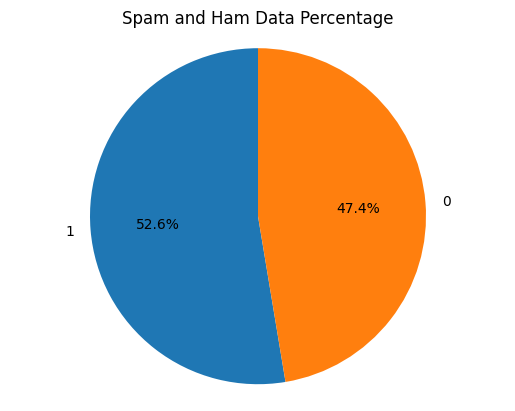

In [15]:
# Plot pie chart of label distribution
df['label'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, title='Spam and Ham Data Percentage', ylabel='')
plt.axis('equal')
plt.show()

In [16]:
df['num_characters'] = df['text'].str.len()
df.head()

,label,text,num_characters
0,1,ounce feather bowl hummingbird opec moment ala...,148
1,1,wulvob get your medircations online qnb ikud v...,808
2,0,computer connection from cnn com wednesday es...,2235
3,1,university degree obtain a prosperous future m...,592
4,0,thanks for all your answers guys i know i shou...,1362


In [17]:
# !python -m textblob.download_corpora

In [18]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,label,text,num_characters,num_words
0,1,ounce feather bowl hummingbird opec moment ala...,148,20
1,1,wulvob get your medircations online qnb ikud v...,808,104
2,0,computer connection from cnn com wednesday es...,2235,338
3,1,university degree obtain a prosperous future m...,592,76
4,0,thanks for all your answers guys i know i shou...,1362,223


In [19]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [20]:
df.head()

,label,text,num_characters,num_words,num_sentences
0,1,ounce feather bowl hummingbird opec moment ala...,148,20,1
1,1,wulvob get your medircations online qnb ikud v...,808,104,1
2,0,computer connection from cnn com wednesday es...,2235,338,1
3,1,university degree obtain a prosperous future m...,592,76,1
4,0,thanks for all your answers guys i know i shou...,1362,223,1


In [21]:
df.describe()

,label,num_characters,num_words,num_sentences
count,83448.000000,83448.000000,83448.000000,83448.000000
mean,0.526196,1662.952725,285.022733,7.250060
std,0.499316,4178.578068,727.032941,34.832317
min,0.000000,1.000000,1.000000,1.000000
25%,0.000000,449.000000,80.000000,1.000000
50%,1.000000,879.000000,154.000000,1.000000
75%,1.000000,1861.000000,314.000000,5.000000
max,1.000000,598705.000000,101984.000000,3093.000000


<Axes: xlabel='num_characters', ylabel='Count'>

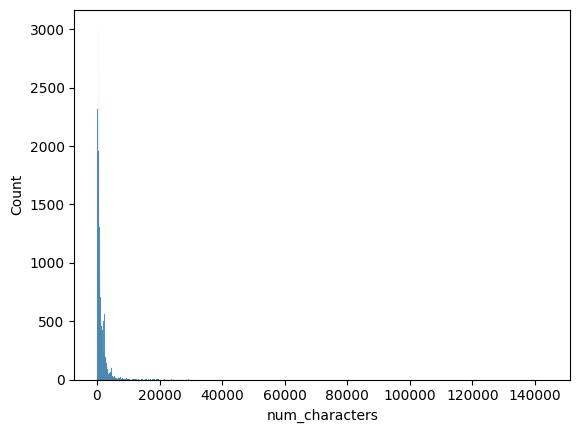

In [22]:
sns.histplot(df[df['label'] == 1]['num_characters'])

<Axes: xlabel='num_characters', ylabel='Count'>

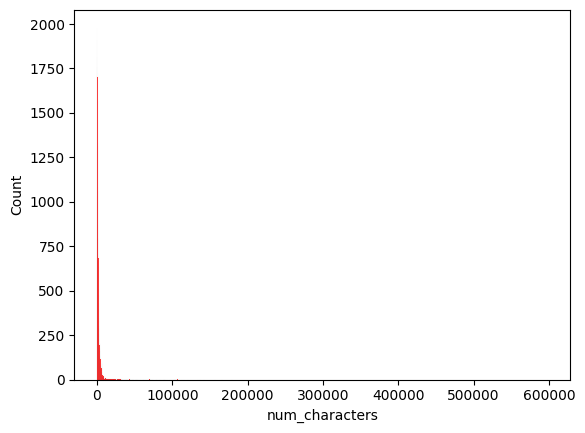

In [23]:
sns.histplot(df[df['label'] == 0]['num_characters'], color='red')

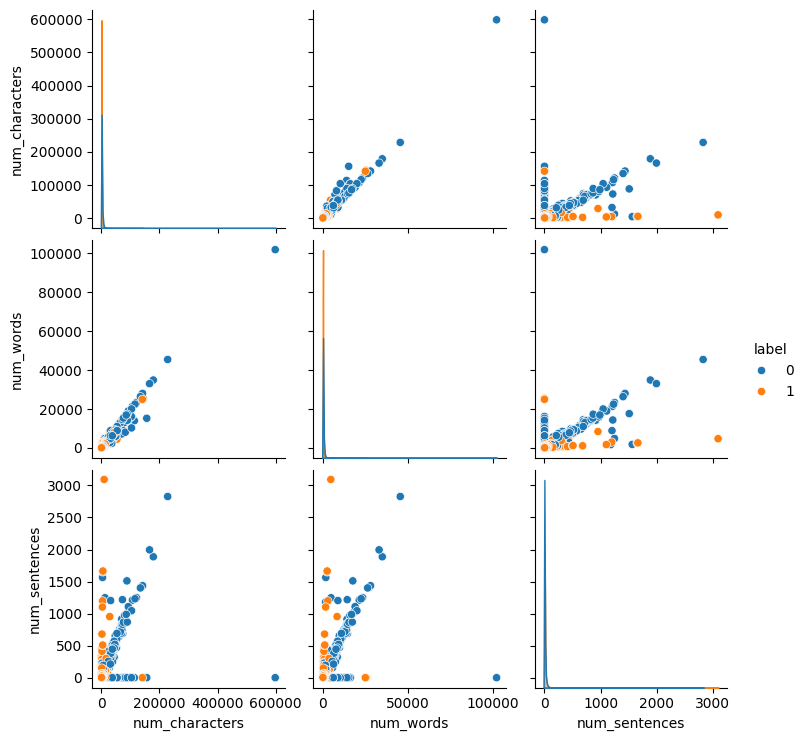

In [24]:
sns.pairplot(df, hue='label')

In [25]:
df.select_dtypes(include='number').corr()


,label,num_characters,num_words,num_sentences
label,1.000000,-0.104176,-0.107857,-0.024172
num_characters,-0.104176,1.000000,0.983551,0.467022
num_words,-0.107857,0.983551,1.000000,0.565622
num_sentences,-0.024172,0.467022,0.565622,1.000000


<Axes: >

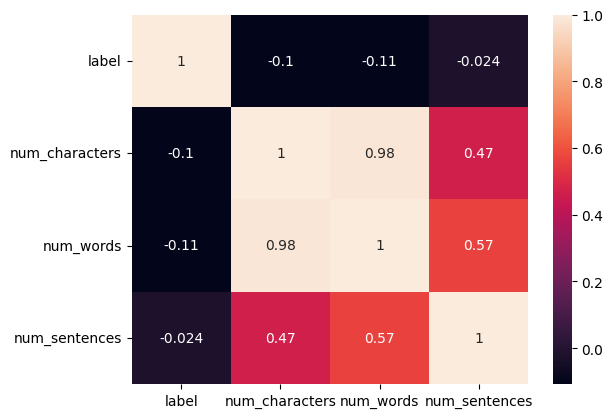

In [26]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

# 3. Data Preprocessing
- lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming


- Fix TextBlob	Keep using your existing code	`python -m textblob.download_corpora`

In [27]:
# !pip install swifter
# nltk.download('punkt')
# nltk.download('stopwords')

In [28]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import swifter

# Load once
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def transform_text(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [ps.stem(word) for word in tokens]
    return " ".join(tokens)

In [29]:
transform_text('I loved the youtube lectures on machine learning. How about you?')

'love youtub lectur machin learn'

In [30]:
df['transformed_text'] = df['text'].swifter.apply(transform_text)


Pandas Apply:   0%|          | 0/83448 [00:00<?, ?it/s]

In [31]:
df.head()

,label,text,num_characters,num_words,num_sentences,transformed_text
0,1,ounce feather bowl hummingbird opec moment ala...,148,20,1,ounc feather bowl hummingbird opec moment alab...
1,1,wulvob get your medircations online qnb ikud v...,808,104,1,wulvob get medirc onlin qnb ikud viagra escape...
2,0,computer connection from cnn com wednesday es...,2235,338,1,comput connect cnn com wednesday escapenumb ma...
3,1,university degree obtain a prosperous future m...,592,76,1,univers degre obtain prosper futur money earn ...
4,0,thanks for all your answers guys i know i shou...,1362,223,1,thank answer guy know check rsync manual would...


In [32]:
# df.to_csv('transformed_data.csv', index=False)

In [33]:
# df = pd.read_csv('/content/transformed_data.csv')
# df.head()

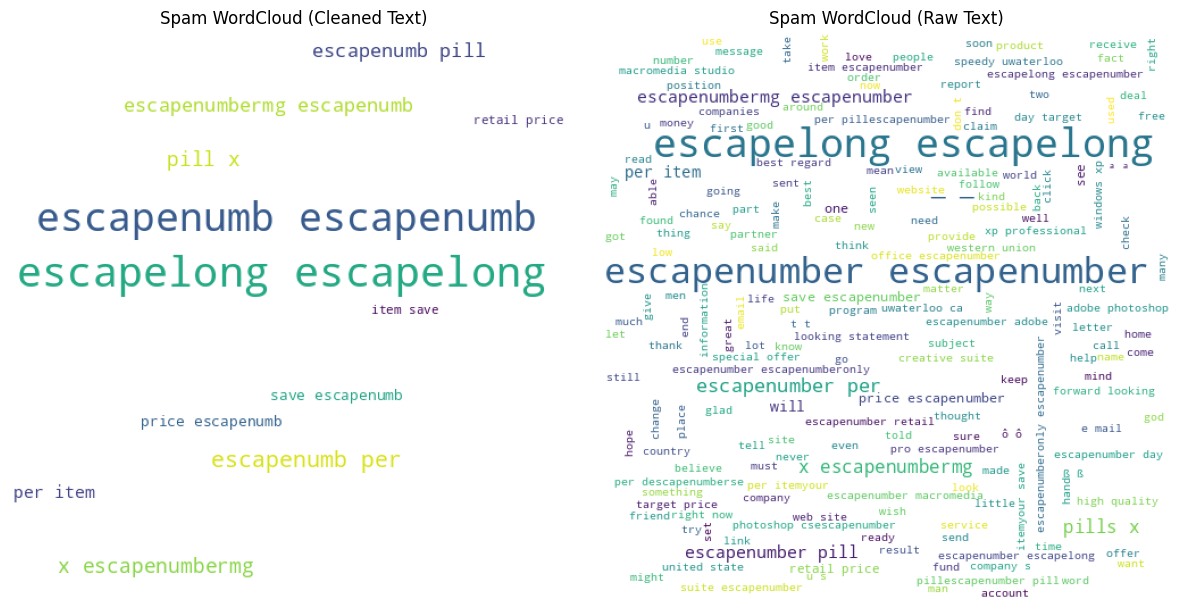

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create both WordClouds
wc_cleaned = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
wc_cleaned.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=' '))

wc_raw = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
wc_raw.generate(df[df['label'] == 1]['text'].str.cat(sep=' '))

# Plot side-by-side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wc_cleaned)
plt.title("Spam WordCloud (Cleaned Text)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wc_raw)
plt.title("Spam WordCloud (Raw Text)")
plt.axis('off')

plt.tight_layout()
plt.show()


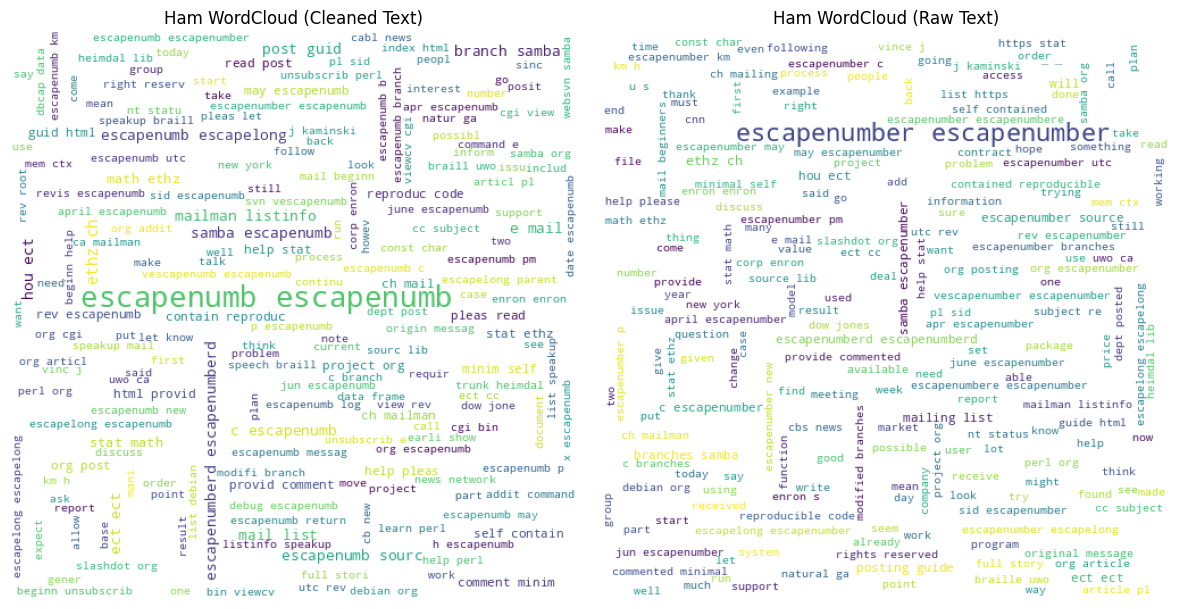

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ham WordCloud from cleaned/stemmed text
wc_cleaned = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
wc_cleaned.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep=' '))

# Ham WordCloud from raw/original text
wc_raw = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
wc_raw.generate(df[df['label'] == 0]['text'].str.cat(sep=' '))

# Plot side by side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wc_cleaned)
plt.title("Ham WordCloud (Cleaned Text)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wc_raw)
plt.title("Ham WordCloud (Raw Text)")
plt.axis('off')

plt.tight_layout()
plt.show()


In [36]:
spam_corpus = []
for msg in df[df['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

ham_corpus = []
for msg in df[df['label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

len(spam_corpus), len(ham_corpus)

(5516343, 9067901)

In [37]:
from collections import Counter
import pandas as pd

# Top 30 words in spam
spam_common = Counter(spam_corpus).most_common(30)
spam_df = pd.DataFrame(spam_common, columns=['Spam_Word', 'Spam_Count'])

# Top 30 words in ham
ham_common = Counter(ham_corpus).most_common(30)
ham_df = pd.DataFrame(ham_common, columns=['Ham_Word', 'Ham_Count'])

# Combine side by side
combined_df = pd.concat([spam_df, ham_df], axis=1)
combined_df


,Spam_Word,Spam_Count,Ham_Word,Ham_Count
0,escapenumb,334188,escapenumb,799755
1,escapelong,188114,http,63544
2,com,29043,r,53489
3,http,27851,enron,52869
4,per,26146,c,45227
5,pill,25499,org,42549
6,price,24409,com,40781
7,x,23825,escapelong,39019
8,escapenumbermg,20546,list,35274
9,compani,19986,help,35031


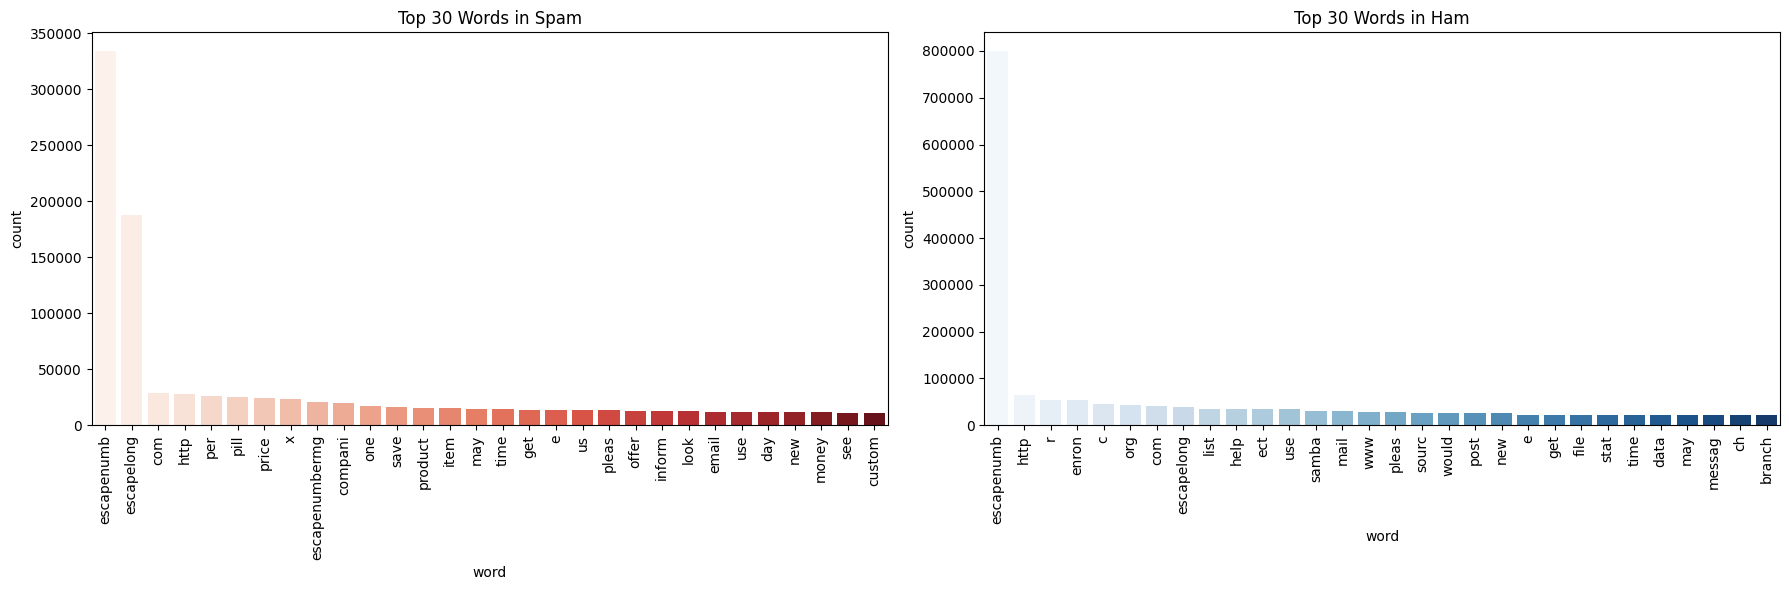

In [38]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ---- Prepare Spam Corpus ----
spam_common_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# ---- Prepare Ham Corpus ----
ham_common_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

# ---- Plot side-by-side ----
plt.figure(figsize=(18, 6))  # wider figure

# Plot 1: Spam
plt.subplot(1, 2, 1)
sns.barplot(x='word', y='count', data=spam_common_df, palette='Reds')
plt.title("Top 30 Words in Spam")
plt.xticks(rotation='vertical')

# Plot 2: Ham
plt.subplot(1, 2, 2)
sns.barplot(x='word', y='count', data=ham_common_df, palette='Blues')
plt.title("Top 30 Words in Ham")
plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()



# Model Building


In [39]:
# Text Vectorization using Bag of words
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [40]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [41]:
X.shape

(83448, 3000)

In [42]:
y = df['label'].values
y

array([1, 1, 0, ..., 1, 0, 1])

In [43]:
# split the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(f'Logistic Regression Confusion_matrix {confusion_matrix(y_test, y_pred_lr)}')
print(f'Logistic Regression Precision_score {precision_score(y_test, y_pred_lr)}')

Logistic Regression Accuracy: 0.9798082684242061
Logistic Regression Confusion_matrix [[7681  231]
 [ 106 8672]]
Logistic Regression Precision_score 0.9740536897674941


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Optional: suppress warnings from xgboost/lightgbm
import warnings
warnings.filterwarnings("ignore")

# Import XGBoost and LightGBM
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Split your data (X = features, y = labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "MultinomialNB": MultinomialNB(),
    "BernoulliNB": BernoulliNB(),
    "GaussianNB": GaussianNB(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "LinearSVC": LinearSVC(),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=0),
    "LightGBM": LGBMClassifier()
}

# Store results
results = []

# Train and evaluate models
for name, model in models.items():
    print(f"\nTraining {name}...")

    # GaussianNB only needs dense input if using sparse matrix
    if name == "GaussianNB":
        if hasattr(X_train, "toarray"):
            model.fit(X_train.toarray(), y_train)
            y_pred = model.predict(X_test.toarray())
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Compute metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1-Score: {f1:.4f}")

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    })

# Summary table
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Accuracy", ascending=False)

print("\nModel Performance Summary:")
print(results_df.to_string(index=False))



Training MultinomialNB...
Accuracy: 0.9584 | Precision: 0.9612 | Recall: 0.9593 | F1-Score: 0.9603

Training BernoulliNB...
Accuracy: 0.8924 | Precision: 0.8687 | Recall: 0.9362 | F1-Score: 0.9012

Training GaussianNB...
Accuracy: 0.9618 | Precision: 0.9596 | Recall: 0.9680 | F1-Score: 0.9638

Training LogisticRegression...
Accuracy: 0.9811 | Precision: 0.9777 | Recall: 0.9865 | F1-Score: 0.9821

Training LinearSVC...
Accuracy: 0.9832 | Precision: 0.9813 | Recall: 0.9867 | F1-Score: 0.9840

Training RandomForest...
Accuracy: 0.9848 | Precision: 0.9830 | Recall: 0.9882 | F1-Score: 0.9856

Training XGBoost...
Accuracy: 0.9793 | Precision: 0.9694 | Recall: 0.9919 | F1-Score: 0.9805

Training LightGBM...
[LightGBM] [Info] Number of positive: 35158, number of negative: 31600
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 4.579905 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 607253
[LightGBM] [Info] Nu

In [53]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to dense if needed
if hasattr(X_train, "toarray"):
    X_train = X_train.toarray()
    X_test = X_test.toarray()

# Initialize ETC
model = ExtraTreesClassifier(n_estimators=100, n_jobs=-1, random_state=42)

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("ExtraTreesClassifier Results:")
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:   ", recall_score(y_test, y_pred))
print("F1-Score: ", f1_score(y_test, y_pred))


ExtraTreesClassifier Results:
Accuracy:  0.9864589574595566
Precision: 0.9875343092406221
Recall:    0.9866316270566727
F1-Score:  0.9870827617741198


In [60]:
import pickle

# Vectorizer save karte waqt file ko 'wb' mode mein open karein (write binary)
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))

# Model bhi isi tarah save karen
pickle.dump(model, open('model.pkl', 'wb'))